In [8]:
# PLOT THE NUMBER OF REPOSITORIES PER CATEGORY

import json
import matplotlib.pyplot as plt

def plot_number_of_repositories_per_category() :
    with open('repository_classifications.json', 'r') as f:
        results = json.load(f)

    print(results)


    # Step 1: Aggregate the counts
    category_counts = {}
    for repo_name, (assigned_category, category_scores) in results.items():
        if assigned_category not in category_counts:
            category_counts[assigned_category] = 0
        category_counts[assigned_category] += 1

    # Step 2: Create a bar chart
    def plot_category_counts(category_counts):
        categories = list(category_counts.keys())
        counts = list(category_counts.values())

        plt.figure(figsize=(12, 8))
        plt.barh(categories, counts, color='skyblue')
        plt.xlabel('Number of Repositories')
        plt.ylabel('Categories')
        plt.title('Number of Repositories per Category')
        plt.gca().invert_yaxis()
        plt.show()
        # save
        plt.savefig('category_counts.png')

    plot_category_counts(category_counts)



Learning Project: 5.98%
Quantum Simulation: 7.65%
No match found: 1.51%
Quantum Machine Learning: 5.69%
General Quantum Algorithms: 5.88%
Quantum Hardware: 0.21%
General Quantum Cryptography: 3.61%
Quantum Computer Tooling and Frameworks: 5.69%
Quantum Computer Simulation: 6.65%
Deutsch-Jozsa Algorithm: 6.48%
Quantum Key Distribution: 8.06%
Shor's Algorithm: 5.36%
Quantum Approximate Optimization Algorithm (QAOA): 5.18%
Variational Quantum Eigensolver (VQE): 13.13%
Quantum Communication: 4.76%
Grover's Algorithm: 0.02%
HHL Algorithm: 4.27%
Simon's Algorithm: 0.77%


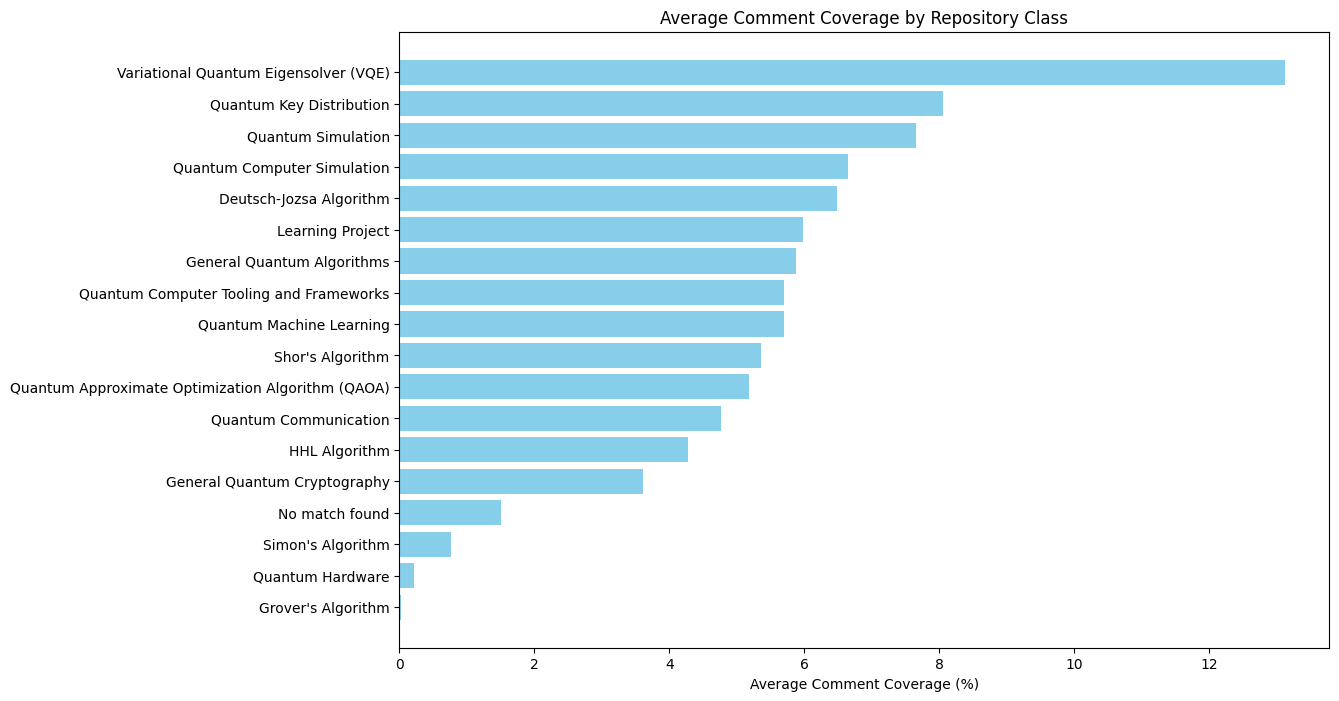

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the repository classification data
with open('repository_classifications.json', 'r') as f:
    classification_data = json.load(f)

# Load the comment coverage data
with open('repository_coverage.json', 'r') as f:
    coverage_data = json.load(f)

# Initialize a dictionary to aggregate comment coverage by category
category_coverage = {}

# Combine data based on repository names
for repo, data in classification_data.items():
    if repo in coverage_data:
        coverage = coverage_data[repo]['comment_coverage']
        main_category = data[0]  # Assuming the first element is the main category name
        if main_category not in category_coverage:
            category_coverage[main_category] = []
        category_coverage[main_category].append(coverage)

# Calculate the average comment coverage for each category
average_coverage = {category: np.mean(coverages) for category, coverages in category_coverage.items()}

# Print the average coverage for debugging
for category, avg in average_coverage.items():
    print(f"{category}: {avg:.2f}%")

# Save the average coverage results to a JSON file
with open('average_coverage_results.json', 'w') as f:
    json.dump(average_coverage, f, indent=4)

# Sort the categories for better visualization
sorted_categories = sorted(average_coverage.keys(), key=lambda x: average_coverage[x], reverse=True)
sorted_averages = [average_coverage[cat] for cat in sorted_categories]

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(sorted_categories, sorted_averages, color='skyblue')
plt.xlabel('Average Comment Coverage (%)')
plt.title('Average Comment Coverage by Repository Class')
plt.gca().invert_yaxis()  # Highest coverage at the top

# Save the plot as an image file
plt.savefig('average_comment_coverage_by_category.png', bbox_inches='tight')

# Show the plot
plt.show()

